In [9]:
import tensorflow as tf

# constant는 그냥 상수다.
node1 = tf.constant(3.0,dtype=tf.float32)
node2 = tf.constant(4.0,dtype=tf.float32)

# placeholder는 나중에 값이 바뀌거나 바꿔줄때 쓴다.
node3 = tf.multiply(node1,node2)

# 그래프를 만들었는데 연산을 수행하는 부분
sess = tf.Session()
print(sess.run(node3))

print(node1,node2,node3) # node이름을 지정하지 않으면 계속 증가한다.
# name으로 접근하는 부분이 있을때 사용해야함.

12.0
Tensor("Const_10:0", shape=(), dtype=float32) Tensor("Const_11:0", shape=(), dtype=float32) Tensor("Mul_2:0", shape=(), dtype=float32)


In [11]:
# placeholder 는 선언 당시에는 값은 비어 있다.
node1 = tf.placeholder(tf.float32, name='node1_ph') # 이름을 지정해주면 증가하지 않는다.
node2 = tf.placeholder(tf.float32, name='node2_ph')
node3 = tf.add(node1,node2) # node1 + node2

with tf.Session() as sess:
# feed_dict : 값을 넣어 주는 것.
  print(sess.run(node3, feed_dict={node1 : 3, node2 : 4}))
  print(sess.run(node3, feed_dict={node1 : 7, node2 : 2}))

7.0
9.0


In [15]:
import numpy as np

a = tf.placeholder(shape = [3,4],dtype = tf.float32, name='node1_ph')
b = tf.placeholder(shape = [4,6],dtype = tf.float32, name='node1_ph')

c = tf.matmul(a,b)

with tf.Session() as sess:
  print('c',sess.run(c, feed_dict={a : np.random.randn(3,4), b : np.random.randn(4,6)}))
  
print('a', a)
print('b', b)

c [[ 0.22431779  0.14117318  0.5968123   1.2636987   1.5213685  -1.6993976 ]
 [ 1.0831525   0.8108345  -2.017994    0.22353935  0.6221471  -0.6681217 ]
 [-0.5337796   1.9798883   0.5988649   0.7648642  -0.5347079   0.33118308]]
a Tensor("node1_ph_5:0", shape=(3, 4), dtype=float32)
b Tensor("node1_ph_6:0", shape=(4, 6), dtype=float32)


In [20]:
# Variable : 학습이 되는 parameter. init을 통해 초기화를 해주어야 함.

W = tf.Variable([.3], dtype=tf.float32) # 0.3
b = tf.Variable([-.3], dtype=tf.float32) # -0.3
x = tf.placeholder(tf.float32) # input이 들어감.

linear_model = W * x + b
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init_op)
  print(sess.run(linear_model, feed_dict={x:5.0}))

[1.2]


In [0]:
from matplotlib import pyplot as plt

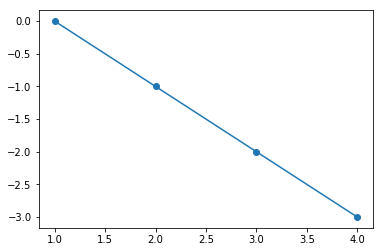

In [22]:
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

plt.scatter(x_train,y_train)
plt.plot(x_train, y_train)
plt.show()

In [25]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W = tf.Variable([0.3], tf.float32)
b = tf.Variable([-0.3], tf.float32)

hypothesis = W * x + b

cost = tf.reduce_sum(tf.square(hypothesis-y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(1000):
    sess.run(train, {x: x_train, y: y_train})
  # evaluate training accuracy
  W_val, b_val, cost_val = sess.run([W, b, cost],
  feed_dict={x: x_train, y: y_train})
  print("W: {W_val} b: {b_val} cost: {cost_val}")

W: {W_val} b: {b_val} cost: {cost_val}
